In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
tf.__version__

'2.4.1'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:

labels_csv = pd.read_csv('data/labels.csv')

In [5]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     47ba3cd4c85935ca5c763258c26607ea  scottish_deerhound
freq                                   1                 126

In [6]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [7]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

d:\projects\dog_breed_identification\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='breed', ylabel='count'>

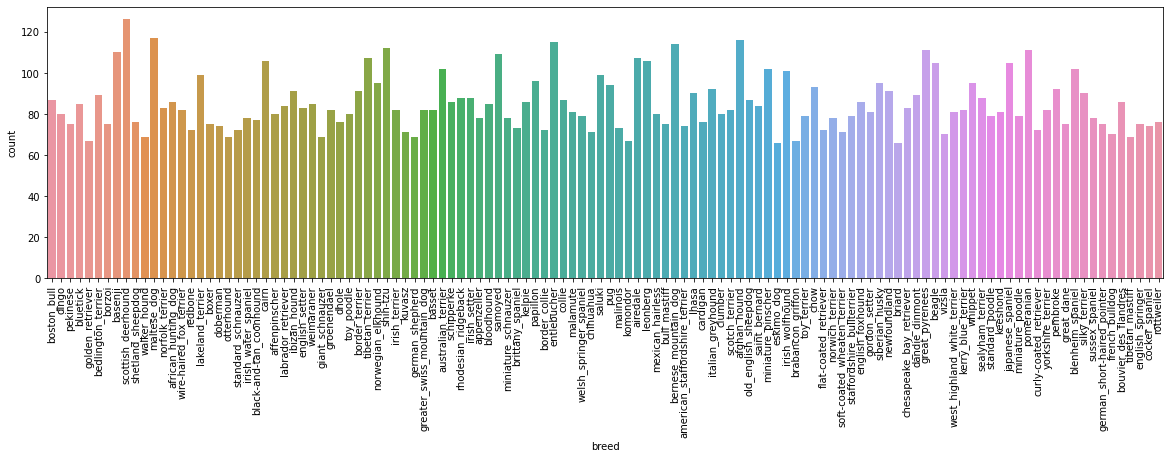

In [8]:
fig = plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.countplot(labels_csv['breed'])

In [9]:
import plotly.express as px

In [10]:
px.histogram(labels_csv['breed'])

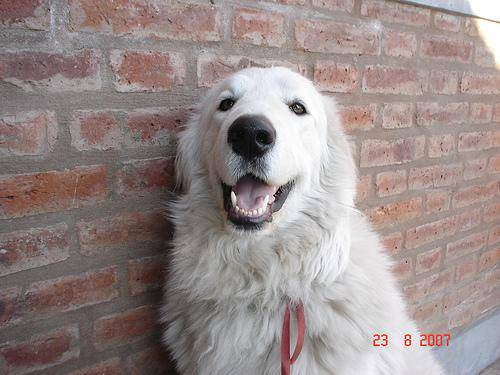

In [11]:
tf.keras.preprocessing.image.load_img('data/train/0a0c223352985ec154fd604d7ddceabd.jpg')

In [12]:
filenames = ["data/train/" + f_name + ".jpg" for f_name in labels_csv['id']]

In [13]:
filenames[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [14]:
import os
if len(os.listdir("data/train/")) == len(filenames):
    print("Equal files")
else:
    print("Not equal")

Equal files


In [15]:
labels = labels_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
len(labels)

10222

In [17]:
unique_breeds = labels_csv['breed'].unique()
unique_breeds

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [18]:
len(unique_breeds)

120

In [19]:
labels[0] == unique_breeds

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
boolean_labels = [label == unique_breeds for label in labels]

In [21]:
boolean_labels[:5]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
X = filenames
y = boolean_labels

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
len(X_train), len(y_train), len(X_val), len(y_val)

(8177, 8177, 2045, 2045)

In [26]:
X_train[:5]

['data/train/ad019e394b55406f412b9a03899d5705.jpg',
 'data/train/c77266278126119fe02a3550dd0c3c1c.jpg',
 'data/train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg',
 'data/train/75dbdbf6814e6c72a7cab75c73a5acd7.jpg',
 'data/train/16fdb4a145a7f5695a264ba980e23bc3.jpg']

In [27]:
y_train[:5]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [28]:
IMG_SIZE = 224

def process_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [29]:
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label


In [30]:
process_image(X[54]), tf.constant(y[54])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.2777311 , 0.2777311 , 0.23067228],
         [0.25812325, 0.2515056 , 0.20113797],
         [0.28679973, 0.27258402, 0.22001052],
         ...,
         [0.8645845 , 0.85674137, 0.86066294],
         [0.86622906, 0.8571604 , 0.8598565 ],
         [0.8890899 , 0.8734036 , 0.86948204]],
 
        [[0.27395725, 0.27395725, 0.22689843],
         [0.24991795, 0.2433003 , 0.19293267],
         [0.2809874 , 0.2667717 , 0.21419819],
         ...,
         [0.82097673, 0.815438  , 0.8182074 ],
         [0.8239562 , 0.81621706, 0.81846994],
         [0.84213173, 0.83495384, 0.82819617]],
 
        [[0.27053574, 0.27221748, 0.22179514],
         [0.24412094, 0.23811604, 0.1865229 ],
         [0.2759804 , 0.2617647 , 0.20453434],
         ...,
         [0.8264772 , 0.8227767 , 0.824627  ],
         [0.8269991 , 0.8211278 , 0.8225316 ],
         [0.846061  , 0.8421394 , 0.8342963 ]],
 
        ...,
 
        [[0.5555527 , 0.5084939 

In [31]:
BATCH_SIZE = 32

def create_batches(X, y=None, valid_data=False, test_data=False):
    if test_data:
        print('Creating test batches')
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    elif valid_data:
        print('Creating validation batches')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                  tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print('Creating training batches')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                  tf.constant(y)))
        shuffled_data = data.shuffle(buffer_size=len(X))
        data_batch = shuffled_data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [32]:
train_data = create_batches(X_train, y_train)

Creating training batches


In [33]:
validation_data = create_batches(X_val, y_val, valid_data=True)

Creating validation batches


In [34]:
train_data.element_spec, validation_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [35]:
def plot_25(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.tight_layout()
        plt.axis("off")


In [36]:
train_images, train_labels = next(train_data.as_numpy_iterator())

In [37]:
len(train_images), len(train_labels)

(32, 32)

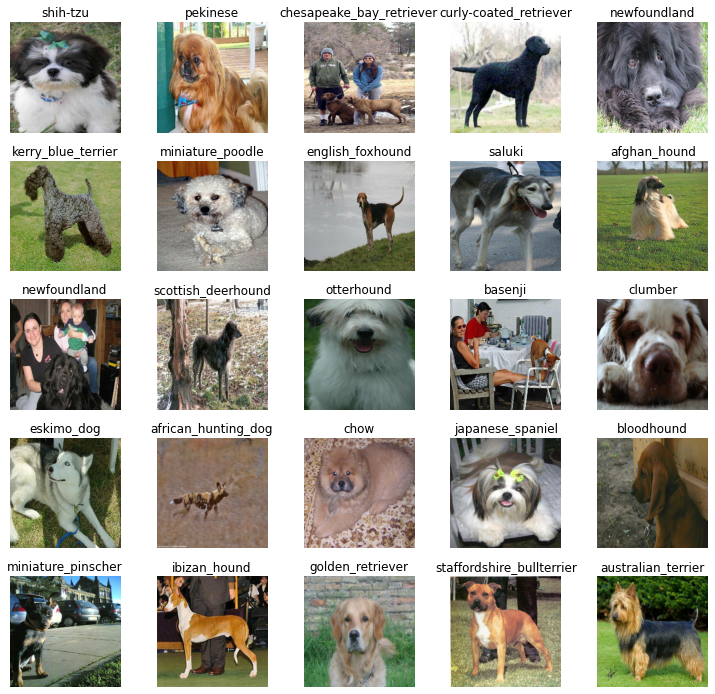

In [38]:
plot_25(train_images, train_labels)

In [39]:
val_images, val_labels = next(validation_data.as_numpy_iterator())

In [40]:
len(val_images), len(val_labels)

(32, 32)

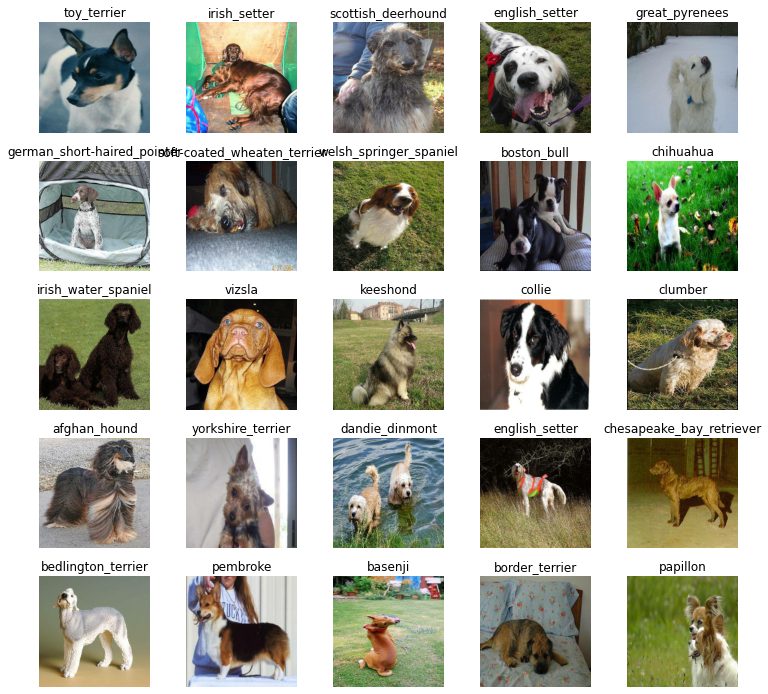

In [41]:
plot_25(val_images, val_labels)

In [42]:
INPUT_SHAPE = [None, 224, 224, 3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [43]:
def create_model(output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    model = tf.keras.models.Sequential([
        hub.KerasLayer(model_url),
        tf.keras.layers.Dense(units=output_shape, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
    model.build(INPUT_SHAPE)
    return model


In [44]:
model = create_model()

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [46]:
%load_ext tensorboard

In [47]:
import datetime
def create_tensorboard_callback():
    log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return tf.keras.callbacks.TensorBoard(log_dir)

In [48]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [49]:
NUM_EPOCHS = 50
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback()
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=validation_data,
              callbacks=[tensorboard, early_stopping])
    return model

In [50]:
model = train_model()

Epoch 1/50
256/256 [==============================] - 71s 213ms/step - loss: 2.6636 - accuracy: 0.4400 - val_loss: 0.7227 - val_accuracy: 0.7932

In [52]:
%tensorboard --logdir "logs/"

Launching TensorBoard...

In [87]:
test_filenames = ["data/test/" + fname for fname in os.listdir('data/test/')]

In [88]:
test_filenames[:10]

['data/test/000621fb3cbb32d8935728e48679680e.jpg',
 'data/test/00102ee9d8eb90812350685311fe5890.jpg',
 'data/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'data/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'data/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'data/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'data/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'data/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'data/test/002f80396f1e3db687c5932d7978b196.jpg',
 'data/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [89]:
test_data = create_batches(test_filenames, test_data=True)

Creating test batches


In [90]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [91]:
test_predictions = model.predict(test_data, verbose=1)

324/324 [==============================] - 52s 161ms/step

In [58]:
test_predictions

array([[3.9655734e-07, 1.3489062e-08, 1.0840541e-03, ..., 1.4664347e-08,
        7.5656139e-08, 7.3453839e-09],
       [1.8025701e-06, 6.3407613e-05, 1.3220378e-07, ..., 2.2783536e-06,
        5.4198119e-07, 1.3523995e-05],
       [2.7731717e-09, 2.7099469e-07, 4.7459125e-06, ..., 6.3229853e-04,
        8.2915085e-06, 9.3809149e-08],
       ...,
       [1.8625357e-07, 2.5452944e-03, 3.5305789e-08, ..., 1.4649315e-07,
        9.2535096e-08, 9.3664099e-08],
       [5.7371894e-06, 9.8013530e-08, 1.6969925e-03, ..., 3.2624428e-08,
        5.0281255e-05, 6.3937784e-07],
       [5.1438963e-07, 7.1050417e-06, 5.2939193e-08, ..., 2.6811115e-06,
        3.6811974e-07, 7.2497278e-07]], dtype=float32)

In [92]:
preds_df =  pd.DataFrame(columns=['id'] + list(unique_breeds))

In [93]:
preds_df

Empty DataFrame
Columns: [id, boston_bull, dingo, pekinese, bluetick, golden_retriever, bedlington_terrier, borzoi, basenji, scottish_deerhound, shetland_sheepdog, walker_hound, maltese_dog, norfolk_terrier, african_hunting_dog, wire-haired_fox_terrier, redbone, lakeland_terrier, boxer, doberman, otterhound, standard_schnauzer, irish_water_spaniel, black-and-tan_coonhound, cairn, affenpinscher, labrador_retriever, ibizan_hound, english_setter, weimaraner, giant_schnauzer, groenendael, dhole, toy_poodle, border_terrier, tibetan_terrier, norwegian_elkhound, shih-tzu, irish_terrier, kuvasz, german_shepherd, greater_swiss_mountain_dog, basset, australian_terrier, schipperke, rhodesian_ridgeback, irish_setter, appenzeller, bloodhound, samoyed, miniature_schnauzer, brittany_spaniel, kelpie, papillon, border_collie, entlebucher, collie, malamute, welsh_springer_spaniel, chihuahua, saluki, pug, malinois, komondor, airedale, leonberg, mexican_hairless, bull_mastiff, bernese_mountain_dog, american_staffordshire_terrier, lhasa, cardigan, italian_greyhound, clumber, scotch_terrier, afghan_hound, old_english_sheepdog, saint_bernard, miniature_pinscher, eskimo_dog, irish_wolfhound, brabancon_griffon, toy_terrier, chow, flat-coated_retriever, norwich_terrier, soft-coated_wheaten_terrier, staffordshire_bullterrier, english_foxhound, gordon_setter, siberian_husky, newfoundland, briard, chesapeake_bay_retriever, dandie_dinmont, great_pyrenees, beagle, vizsla, west_highland_white_terrier, kerry_blue_terrier, ...]
Index: []

[0 rows x 121 columns]

In [94]:
id_filenames = [id[10:-4] for id in test_filenames]

In [95]:
id_filenames[:10]

['000621fb3cbb32d8935728e48679680e',
 '00102ee9d8eb90812350685311fe5890',
 '0012a730dfa437f5f3613fb75efcd4ce',
 '001510bc8570bbeee98c8d80c8a95ec1',
 '001a5f3114548acdefa3d4da05474c2e',
 '00225dcd3e4d2410dd53239f95c0352f',
 '002c2a3117c2193b4d26400ce431eebd',
 '002c58d413a521ae8d1a5daeb35fc803',
 '002f80396f1e3db687c5932d7978b196',
 '0036c6bcec6031be9e62a257b1c3c442']

In [96]:
preds_df["id"] = id_filenames

In [97]:
preds_df

id boston_bull dingo pekinese bluetick  \
0      000621fb3cbb32d8935728e48679680e         NaN   NaN      NaN      NaN   
1      00102ee9d8eb90812350685311fe5890         NaN   NaN      NaN      NaN   
2      0012a730dfa437f5f3613fb75efcd4ce         NaN   NaN      NaN      NaN   
3      001510bc8570bbeee98c8d80c8a95ec1         NaN   NaN      NaN      NaN   
4      001a5f3114548acdefa3d4da05474c2e         NaN   NaN      NaN      NaN   
...                                 ...         ...   ...      ...      ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8         NaN   NaN      NaN      NaN   
10353  fff1ec9e6e413275984966f745a313b0         NaN   NaN      NaN      NaN   
10354  fff74b59b758bbbf13a5793182a9bbe4         NaN   NaN      NaN      NaN   
10355  fff7d50d848e8014ac1e9172dc6762a3         NaN   NaN      NaN      NaN   
10356  fffbff22c1f51e3dc80c4bf04089545b         NaN   NaN      NaN      NaN   

      golden_retriever bedlington_terrier borzoi basenji scottish_deerhound  \
0                  NaN                NaN    NaN     NaN                NaN   
1                  NaN                NaN    NaN     NaN                NaN   
2                  NaN                NaN    NaN     NaN                NaN   
3                  NaN                NaN    NaN     NaN                NaN   
4                  NaN                NaN    NaN     NaN                NaN   
...                ...                ...    ...     ...                ...   
10352              NaN                NaN    NaN     NaN                NaN   
10353              NaN                NaN    NaN     NaN                NaN   
10354              NaN                NaN    NaN     NaN                NaN   
10355              NaN                NaN    NaN     NaN                NaN   
10356              NaN                NaN    NaN     NaN                NaN   

       ... blenheim_spaniel silky_terrier sussex_spaniel  \
0      ...              NaN           NaN            NaN   
1      ...              NaN           NaN            NaN   
2      ...              NaN           NaN            NaN   
3      ...              NaN           NaN            NaN   
4      ...              NaN           NaN            NaN   
...    ...              ...           ...            ...   
10352  ...              NaN           NaN            NaN   
10353  ...              NaN           NaN            NaN   
10354  ...              NaN           NaN            NaN   
10355  ...              NaN           NaN            NaN   
10356  ...              NaN           NaN            NaN   

      german_short-haired_pointer french_bulldog bouvier_des_flandres  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
10352                         NaN            NaN                  NaN   
10353                         NaN            NaN                  NaN   
10354                         NaN            NaN                  NaN   
10355                         NaN            NaN                  NaN   
10356                         NaN            NaN                  NaN   

      tibetan_mastiff english_springer cocker_spaniel rottweiler  
0                 NaN              NaN            NaN        NaN  
1                 NaN              NaN            NaN        NaN  
2                 NaN              NaN            NaN        NaN  
3                 NaN              NaN            NaN        NaN  
4                 NaN              NaN            NaN        NaN  
...               ...              ...            ...        ...  
10352             NaN              NaN            NaN        NaN  
10353

In [98]:
preds_df[list(unique_breeds)] = test_predictions

In [99]:
preds_df

id boston_bull     dingo  pekinese  \
0      000621fb3cbb32d8935728e48679680e         0.0       0.0  0.001084   
1      00102ee9d8eb90812350685311fe5890    0.000002  0.000063       0.0   
2      0012a730dfa437f5f3613fb75efcd4ce         0.0       0.0  0.000005   
3      001510bc8570bbeee98c8d80c8a95ec1    0.000004       0.0  0.000276   
4      001a5f3114548acdefa3d4da05474c2e         0.0       0.0   0.00004   
...                                 ...         ...       ...       ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8         0.0  0.000002       0.0   
10353  fff1ec9e6e413275984966f745a313b0    0.000104       0.0  0.000002   
10354  fff74b59b758bbbf13a5793182a9bbe4         0.0  0.002545       0.0   
10355  fff7d50d848e8014ac1e9172dc6762a3    0.000006       0.0  0.001697   
10356  fffbff22c1f51e3dc80c4bf04089545b    0.000001  0.000007       0.0   

       bluetick golden_retriever bedlington_terrier    borzoi   basenji  \
0           0.0              0.0                0.0  0.000001       0.0   
1           0.0         0.000006           0.000001  0.000046  0.000003   
2      0.000001           0.0001                0.0  0.000807       0.0   
3      0.000015              0.0           0.000001  0.000001       0.0   
4           0.0              0.0                0.0       0.0       0.0   
...         ...              ...                ...       ...       ...   
10352  0.000013         0.000012           0.000763  0.000001       0.0   
10353  0.000008         0.000067           0.002884       0.0       0.0   
10354  0.000001         0.000008           0.000001  0.000001   0.00001   
10355  0.000008              0.0                0.0  0.000001  0.000001   
10356  0.000003              0.0           0.000012   0.00041       0.0   

      scottish_deerhound  ... blenheim_spaniel silky_terrier sussex_spaniel  \
0                    0.0  ...         0.000431           0.0            0.0   
1               0.000001  ...         0.000004           0.0            0.0   
2               0.000265  ...         0.000002           0.0       0.000005   
3               0.000001  ...         0.000002      0.000001       0.000004   
4                    0.0  ...              0.0      0.000114       0.000001   
...                  ...  ...              ...           ...            ...   
10352           0.000014  ...              0.0           0.0       0.000001   
10353                0.0  ...              0.0           0.0            0.0   
10354           0.000002  ...         0.000005      0.000001            0.0   
10355                0.0  ...         0.000074      0.000479       0.000002   
10356           0.738677  ...              0.0           0.0       0.000001   

      german_short-haired_pointer french_bulldog bouvier_des_flandres  \
0                             0.0       0.000001                  0.0   
1                             0.0        0.00003             0.000001   
2                        0.000041            0.0                  0.0   
3                             0.0       0.000008              0.00133   
4                             0.0       0.000002             0.000564   
...                           ...            ...                  ...   
10352                    0.000005            0.0                  0.0   
10353                    0.000052       0.000002                  0.0   
10354                         0.0       0.000002                  0.0   
10355                         0.0        0.00159             0.000001   
10356                    0.000172            0.0             0.000036   

      tibetan_mastiff english_springer cocker_spaniel rottweiler  
0                 0.0              0.0            0.0        0.0  
1            0.000279         0.000002       0.000001   0.000014  
2                 0.0         0.000632       0.000008        0.0  
3            0.000026         0.000001       0.000006   0.000008  
4             0.00005              0.0       0.000012   0.000004  
...    

In [100]:
preds_df.to_csv("submission/mobilenetv2.csv", index=False)

In [108]:
custom_filenames = ["my_dog_photos/" + fname for fname in os.listdir('my_dog_photos/')]

In [109]:
custom_filenames

['my_dog_photos/bulldog.jpg',
 'my_dog_photos/chihuaha.jpg',
 'my_dog_photos/german_shepherd.jpg',
 'my_dog_photos/pomeranian.jpg']

In [110]:
custom_data = create_batches(custom_filenames, test_data=True)

Creating test batches


In [111]:
custom_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [112]:
custom_preds = model.predict(custom_data)

In [113]:
custom_preds.shape

(4, 120)

In [114]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

In [116]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [117]:
custom_pred_labels

['french_bulldog', 'chihuahua', 'german_shepherd', 'pomeranian']

In [125]:
def save_model(model, suffix=None):
  modeldir = "models/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [126]:
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [127]:
save_model(model, suffix="MobileNetv2")



Saving model to: models/20210515-124122-MobileNetv2.h5...


'models/20210515-124122-MobileNetv2.h5'